# Table of Contents

01. Import Libraries
02. Import Data Frame
03. Clean Data Frame
04. Data Standardization
05. Applying the elbow technique
06. k-means clustering
07. Clustering Female Data
08. Clustering Male Data
09. Calculate Descriptive Statistics
10. Propose future steps of an analytic pipeline

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the charts that are create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Import Data Frame

In [3]:
# Create path

path = r'/Users/dianaalatriste/Documents/Olympic Games'

In [4]:
# Call path

path

'/Users/dianaalatriste/Documents/Olympic Games'

In [5]:
# Import Data Frame

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'Olympic_Results_Merged_wcodes.csv'))

In [6]:
df.head(10)

,Unnamed: 0,athlete_id,result_id,pos,medal,isTeamSport,name,gender,born,height,...,sport,result_detail,start_date,end_date,age,season,medal_code,gender_code,sport_code,season_code
0,0,64710,56265,DNS,na,False,Ernest Hutcheon,Male,1889-06-17,176.960745,...,Athletics,na,1908-07-20,1908-07-22,19.088296,Summer,3,1,9,0
1,1,64756,56313,DNS,na,False,Henry Murray,Male,1886-01-14,179.660099,...,Athletics,na,1908-07-21,1908-07-25,22.513347,Summer,3,1,9,0
2,2,64808,56338,3 h8 r1/2,na,False,Harvey Sutton,Male,1882-02-18,179.050863,...,Athletics,na,1908-07-20,1908-07-21,26.414784,Summer,3,1,9,0
3,3,922519,56338,DNS,na,False,Guy Haskins,Male,1883-12-23,179.050863,...,Athletics,na,1908-07-20,1908-07-21,24.572211,Summer,3,1,9,0
4,4,64735,56338,DNS,na,False,Joseph Lynch,Male,1878-04-22,179.050863,...,Athletics,na,1908-07-20,1908-07-21,30.242300,Summer,3,1,9,0
5,5,64756,56338,DNS,na,False,Henry Murray,Male,1886-01-14,179.050863,...,Athletics,na,1908-07-20,1908-07-21,22.510609,Summer,3,1,9,0
6,6,64735,56349,5 h2 r1/2,na,False,Joseph Lynch,Male,1878-04-22,177.920955,...,Athletics,na,1908-07-13,1908-07-14,30.223135,Summer,3,1,9,0
7,7,79576,56349,AC h3 r1/2,na,False,Charles Swain,Male,1885-01-16,177.920955,...,Athletics,na,1908-07-13,1908-07-14,23.485284,Summer,3,1,9,0
8,8,922519,56349,DNS,na,False,Guy Haskins,Male,1883-12-23,177.920955,...,Athletics,na,1908-07-13,1908-07-14,24.553046,Summer,3,1,9,0
9,9,64619,56349,DNS,na,False,George Blake,Male,1878-09-04,167.000000,...,Athletics,na,1908-07-13,1908-07-14,29.853525,Summer,3,1,9,0


In [7]:
df.shape

(314907, 26)

In [8]:
df.dtypes

Unnamed: 0         int64
athlete_id         int64
result_id          int64
pos               object
medal             object
isTeamSport         bool
name              object
gender            object
born              object
height           float64
weight           float64
country           object
country_noc       object
event_title       object
edition           object
edition_id       float64
sport             object
result_detail     object
start_date        object
end_date          object
age              float64
season            object
medal_code         int64
gender_code        int64
sport_code         int64
season_code        int64
dtype: object

# 03. Clean Data Frame

### Create a female and a male subset

In [9]:
# Create female subset

female = df[df.gender == 'Female']

In [10]:
# Create male subset

male = df[df.gender == 'Male']

### Dropped categorical and non relevant variables

In [21]:
df = df.drop(columns = ['Unnamed: 0', 'athlete_id', 'result_id', 'pos','medal', 'isTeamSport', 'name', 'gender', 'born', 'country', 'country_noc', 'event_title', 'edition', 'edition_id','sport', 'result_detail', 'start_date', 'end_date', 'season', 'medal_code', 'gender_code', 'sport_code'])

In [22]:
df.head()

,height,weight,age,season_code
0,176.960745,72.096796,19.088296,0
1,179.660099,71.493797,22.513347,0
2,179.050863,67.571038,26.414784,0
3,179.050863,67.571038,24.572211,0
4,179.050863,67.571038,30.242300,0


In [23]:
df = df.drop(columns = ['season_code'])

In [24]:
df.head()

,height,weight,age
0,176.960745,72.096796,19.088296
1,179.660099,71.493797,22.513347
2,179.050863,67.571038,26.414784
3,179.050863,67.571038,24.572211
4,179.050863,67.571038,30.242300


In [25]:
df['height'].value_counts(dropna = False)

180.000000    13647
170.000000    13461
178.000000    11941
175.000000    11235
183.000000     9139
              ...  
180.816327        1
174.648780        1
170.702128        1
150.530303        1
174.465517        1
Name: height, Length: 806, dtype: int64

In [26]:
df['weight'].value_counts(dropna = False)

70.000000     10924
75.000000      8800
60.000000      8787
68.000000      8031
65.000000      7974
              ...  
84.847458         1
71.821429         1
63.611111         1
175.000000        1
72.563877         1
Name: weight, Length: 884, dtype: int64

In [27]:
df['age'].value_counts(dropna = False)

26.487681    236
24.013088    216
25.610184    136
41.595207    132
NaN          130
            ... 
40.136893      1
44.632444      1
49.130732      1
45.705681      1
41.284052      1
Name: age, Length: 14575, dtype: int64

In [28]:
df.isnull().sum()

height    863
weight    863
age       130
dtype: int64

### Drop 'na' in 'age' column

In [29]:
df.dropna(subset = ['age'], inplace = True)

In [30]:
# Check output by rechecking missing values

df.isnull().sum()

height    775
weight    775
age         0
dtype: int64

In [31]:
# Create now a data frame filtering rows with populated values in 'height' and 'weight'

df_cleaned = df[(df['height'].notnull()) & (df['weight'].notnull())]

In [32]:
df_cleaned.isnull().sum()

height    0
weight    0
age       0
dtype: int64

In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314002 entries, 0 to 314906
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   height  314002 non-null  float64
 1   weight  314002 non-null  float64
 2   age     314002 non-null  float64
dtypes: float64(3)
memory usage: 9.6 MB


### Check differences between your variables’ scales

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_40826/3308111326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_cleaned['height'].dropna(),color='blue',kde=True)
/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_40826/3308111326.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


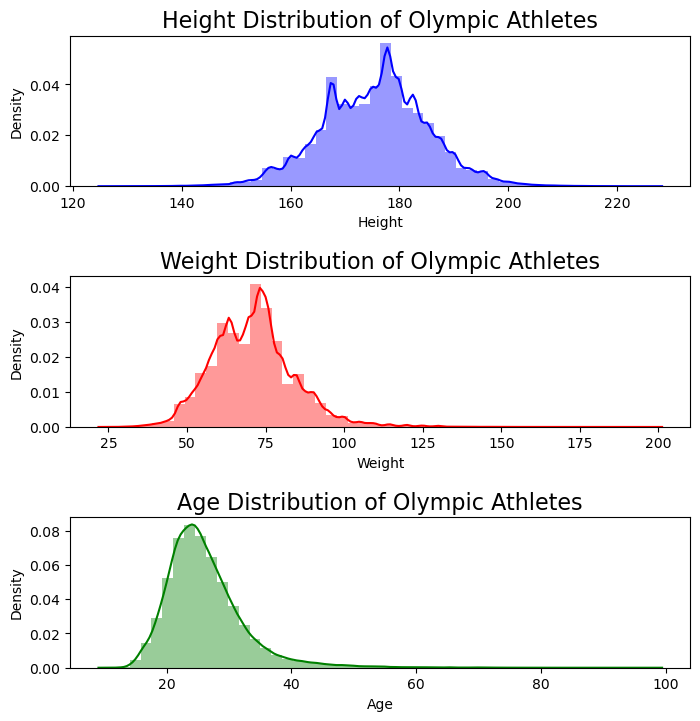

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(311)
ax=sns.distplot(df_cleaned['height'].dropna(),color='blue',kde=True)
ax.set_xlabel('Height')
ax.set_ylabel('Density')
ax.set_title('Height Distribution of Olympic Athletes',fontsize=16,fontweight=200)
plt.subplot(312)
ax1=sns.distplot(df_cleaned['weight'].dropna(),color='Red',kde=True)
ax1.set_xlabel('Weight')
ax1.set_ylabel('Density')
ax1.set_title('Weight Distribution of Olympic Athletes',fontsize=16,fontweight=200)
plt.subplot(313)
ax2=sns.distplot(df_cleaned['age'].dropna(),color='green',kde=True)
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')
ax2.set_title('Age Distribution of Olympic Athletes',fontsize=16,fontweight=200)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)


Height is the vairbale that has the biggest variance. Therefore, I will standardize the data. 

# 04. Data Standardization

In [35]:
# Define standard scaler

scaler = StandardScaler()

In [36]:
# Transform data 

df_cleaned_standard = scaler.fit_transform(df_cleaned)

In [37]:
df_cleaned_standard

array([[ 0.14800249,  0.07658994, -1.11712664],
       [ 0.42623138,  0.03109516, -0.5755762 ],
       [ 0.36343598, -0.26486715,  0.04129781],
       ...,
       [-0.56945839,  0.52197194,  0.57808642],
       [-0.05409627,  0.22018194,  1.62958604],
       [-0.38205398,  0.22018194,  0.37289464]])

# 05. Applying the elbow technique

In [38]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [39]:
# Calculate scores for k-means

score = [kmeans[i].fit(df_cleaned_standard).score(df_cleaned_standard) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-942005.9999999983,
 -580686.2806417888,
 -438353.4052316593,
 -341083.0332944697,
 -297742.46564443584,
 -262068.91894206358,
 -231549.2036549455,
 -209935.45809623168,
 -195127.53526100967]

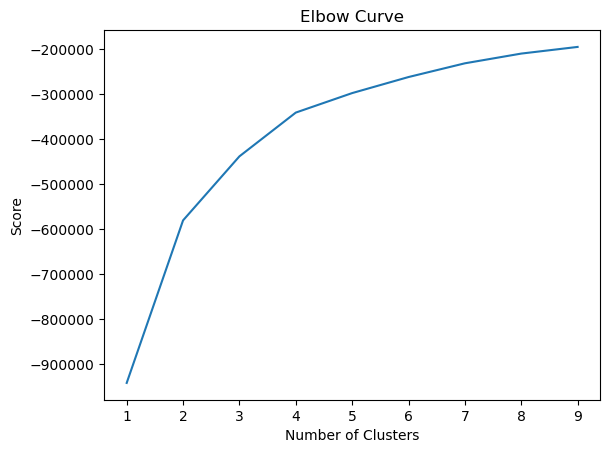

In [40]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the elbow curve of my data farme, I can see a large jump from two to three and from three to four on the x-axis. After that, the curve straightens out. This means that the optimal count for the clusters in this data frame is 4.

# 06. k-means clustering

In [41]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_init =10) 


In [42]:
# Fit the k-means object to the data.

kmeans.fit(df_cleaned_standard)

KMeans(n_clusters=4, n_init=10)

### Attaching a new column to  data frame with the resulting clusters

In [43]:
df_cleaned_standard.shape

(314002, 3)

In [44]:
df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned_standard)

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_40826/194382640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned_standard)


In [45]:
df_cleaned.head()

,height,weight,age,clusters
0,176.960745,72.096796,19.088296,0
1,179.660099,71.493797,22.513347,0
2,179.050863,67.571038,26.414784,0
3,179.050863,67.571038,24.572211,0
4,179.050863,67.571038,30.242300,0


In [46]:
df_cleaned['clusters'].value_counts()

0    125984
1     99218
3     51229
2     37571
Name: clusters, dtype: int64

## Plot clusters : height vs. weight

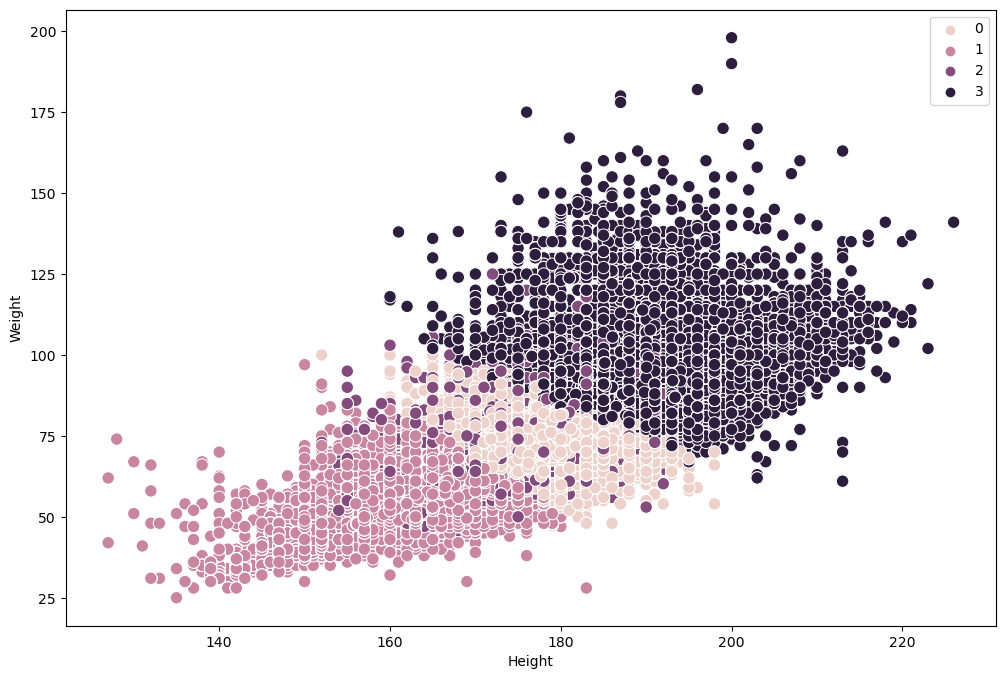

In [47]:
# Plot the clusters for the "height" and "weight" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['height'], y=df_cleaned['weight'], hue=kmeans.labels_, s=80) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Height') # Label x-axis.
plt.ylabel('Weight') # Label y-axis.
plt.show()

## Plot clusters : height vs. age

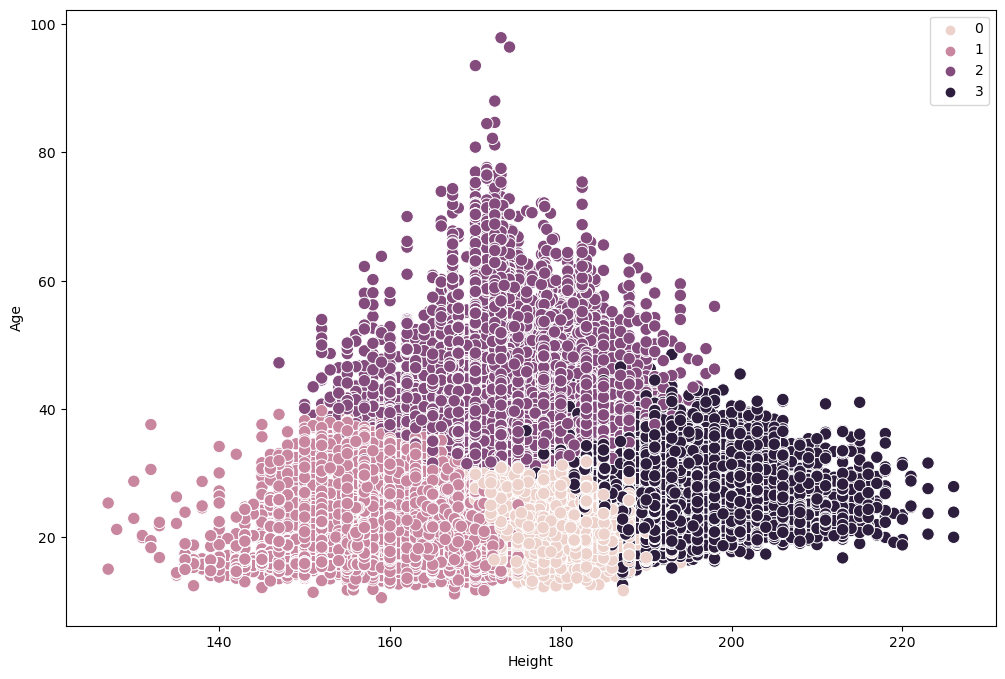

In [48]:
# Plot the clusters for the "height" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['height'], y=df_cleaned['age'], hue=kmeans.labels_, s=80) 


ax.grid(False) 
plt.xlabel('Height') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

## Plot clusters : weight vs. age

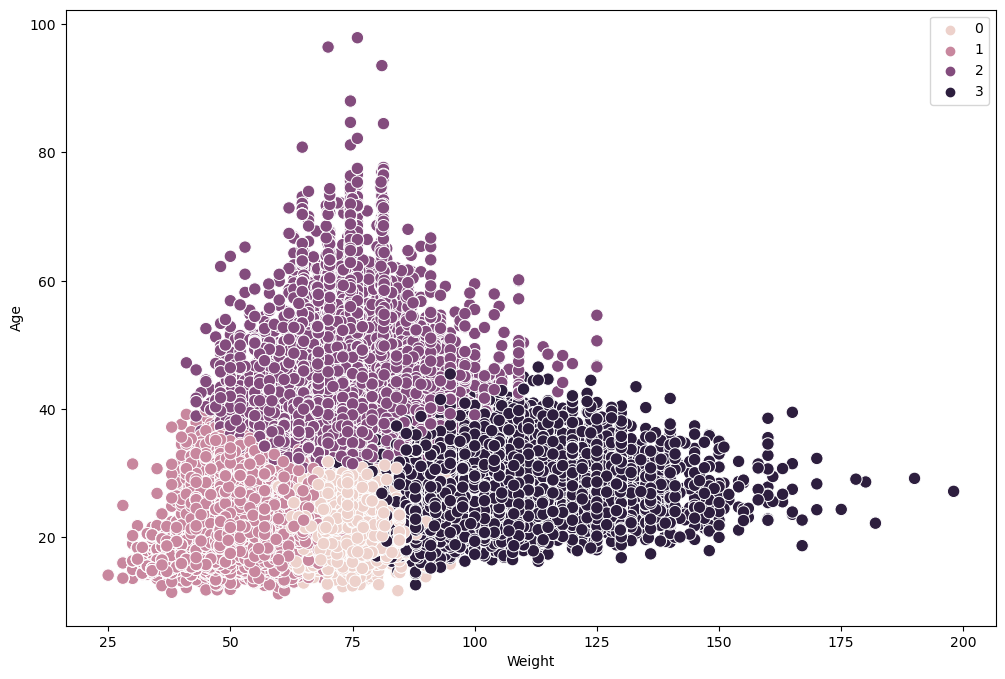

In [49]:
# Plot the clusters for the "weight" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['weight'], y=df_cleaned['age'], hue=kmeans.labels_, s=80) 


ax.grid(False) 
plt.xlabel('Weight') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

# 07. Clustering female data

In [11]:
# Check female df

female.head()

,Unnamed: 0,athlete_id,result_id,pos,medal,isTeamSport,name,gender,born,height,...,sport,result_detail,start_date,end_date,age,season,medal_code,gender_code,sport_code,season_code
128,128,45034,4636,1,Gold,False,Fanny Durack,Female,1889-10-27,171.729023,...,Swimming,na,1912-07-08,1912-07-12,22.694045,Summer,1,0,94,0
129,129,45146,4636,2,Silver,False,Mina Wylie,Female,1891-06-27,171.729023,...,Swimming,na,1912-07-08,1912-07-12,21.029432,Summer,2,0,94,0
146,146,694,44057,=3,Bronze,False,Hedwig Rosenbaum,Female,1864-07-03,167.553441,...,Tennis,na,1900-07-06,1900-07-11,36.005476,Summer,0,0,97,0
147,147,694,44067,=3,Bronze,True,Hedwig Rosenbaum,Female,1864-07-03,176.307888,...,Tennis,na,1900-07-06,1900-07-11,36.005476,Summer,0,0,97,0
347,347,1805027,44501,DNS,na,False,Josefine von Lobkowitz,Female,1886-03-03,167.553441,...,Tennis,na,1912-07-01,1912-07-04,26.327173,Summer,3,0,97,0


In [12]:
# Check columns

female.columns

Index(['Unnamed: 0', 'athlete_id', 'result_id', 'pos', 'medal', 'isTeamSport',
       'name', 'gender', 'born', 'height', 'weight', 'country', 'country_noc',
       'event_title', 'edition', 'edition_id', 'sport', 'result_detail',
       'start_date', 'end_date', 'age', 'season', 'medal_code', 'gender_code',
       'sport_code', 'season_code'],
      dtype='object')

In [16]:
# Drop non relevant columns for clustering

female = female.drop(columns = ['Unnamed: 0', 'athlete_id', 'result_id', 'pos','medal', 'isTeamSport', 'name', 'gender', 'born', 'country', 'country_noc', 'event_title', 'edition', 'edition_id','sport', 'result_detail', 'start_date', 'end_date', 'season', 'medal_code', 'gender_code', 'sport_code', 'season_code'])

In [17]:
# Check null values

female.isnull().sum()

height    37
weight    37
age        0
dtype: int64

In [18]:
# Create now a data frame filtering rows with populated values in 'height' and 'weight'

fem_cleaned = female[(female['height'].notnull()) & (female['weight'].notnull())]

In [19]:
fem_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89273 entries, 128 to 314906
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  89273 non-null  float64
 1   weight  89273 non-null  float64
 2   age     89273 non-null  float64
dtypes: float64(3)
memory usage: 2.7 MB


## Standardize female data

In [50]:
# Transform data 

female_standard = scaler.fit_transform(fem_cleaned)

In [51]:
female_standard

array([[ 0.4606871 ,  0.17590648, -0.3140381 ],
       [ 0.4606871 ,  0.17590648, -0.6007278 ],
       [-0.04183804, -0.03761583,  1.97853648],
       ...,
       [ 0.25260172,  1.82110887,  0.91146609],
       [ 0.85434425,  1.41158082,  2.05681032],
       [ 0.47141718,  1.41158082,  0.68796128]])

## Applying elbow technique

In [78]:
num_cl_fem = range(1, 10) # Defines the range of potential clusters in the data.
kmeans_fem = [KMeans(n_clusters=i, n_init=10) for i in num_cl_fem] # Defines k-means clusters in the range assigned above.

In [79]:
# Calculate scores for k-means

score_fem = [kmeans_fem[i].fit(female_standard).score(female_standard) for i in range(len(kmeans_fem))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score_fem

[-267819.00000000023,
 -174471.50274544448,
 -136202.9842151368,
 -105714.15557791306,
 -93591.30893749646,
 -82981.54224291004,
 -74945.83971307681,
 -68922.60886532963,
 -63836.015376352065]

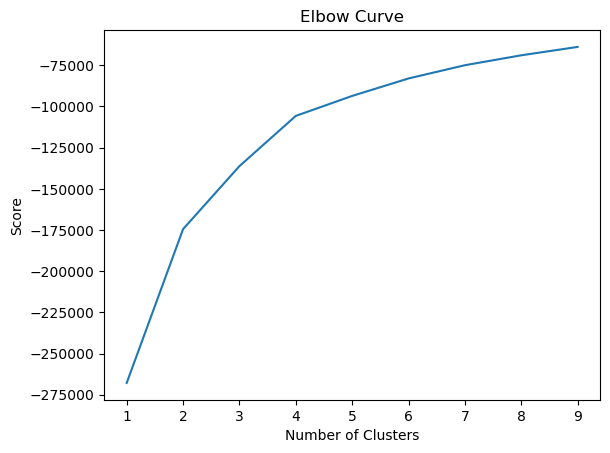

In [80]:
# Plot the elbow curve using PyLab

pl.plot(num_cl_fem,score_fem)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## k-means clustering

In [81]:
# Create the k-means object.

kmeans_fem = KMeans(n_clusters = 4, n_init =10) 


In [82]:
# Fit the k-means object to the data.

kmeans_fem.fit(female_standard)

KMeans(n_clusters=4, n_init=10)

## Attaching a new column to data frame with the resulting clusters

In [83]:
female_standard.shape

(89273, 3)

In [84]:
fem_cleaned['clusters'] = kmeans.fit_predict(female_standard)

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_40826/3223862480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_cleaned['clusters'] = kmeans.fit_predict(female_standard)


In [85]:
fem_cleaned.head()

,height,weight,age,clusters
128,171.729023,61.930748,22.694045,0
129,171.729023,61.930748,21.029432,0
146,167.553441,59.845203,36.005476,2
147,176.307888,70.316327,36.005476,2
347,167.553441,59.845203,26.327173,0


In [61]:
fem_cleaned['clusters'].value_counts(dropna=False)

0    35424
2    19610
1    17758
3    16481
Name: clusters, dtype: int64

## Plot clusters : height vs. age

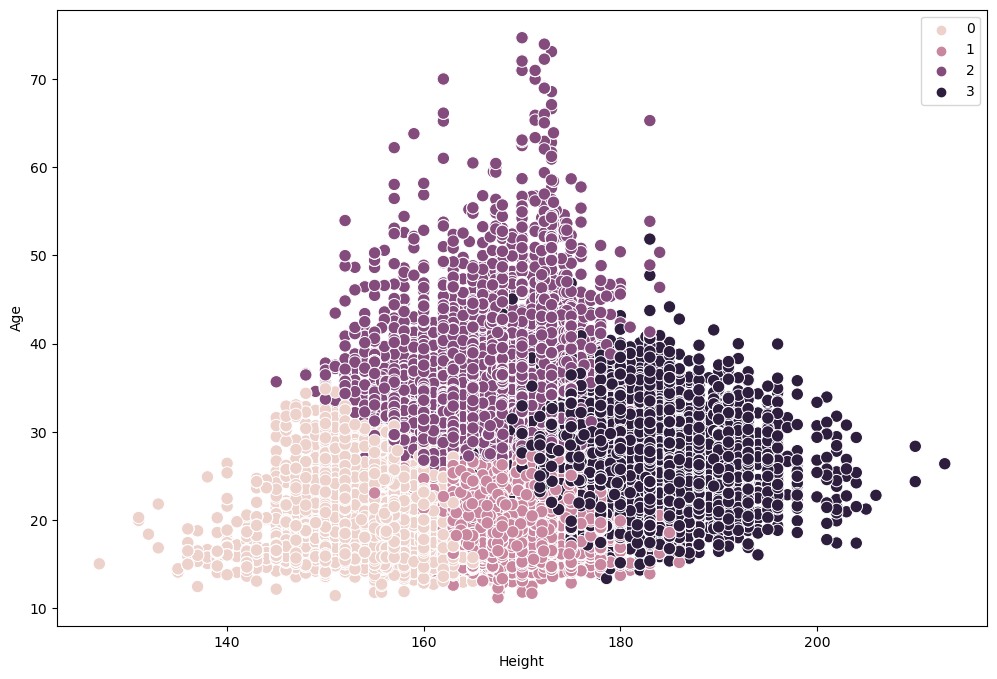

In [86]:
# Plot the clusters for the "height" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=fem_cleaned['height'], y=fem_cleaned['age'], hue=kmeans_fem.labels_, s=80) 


ax.grid(False) 
plt.xlabel('Height') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

## Plot clusters : weight vs. age

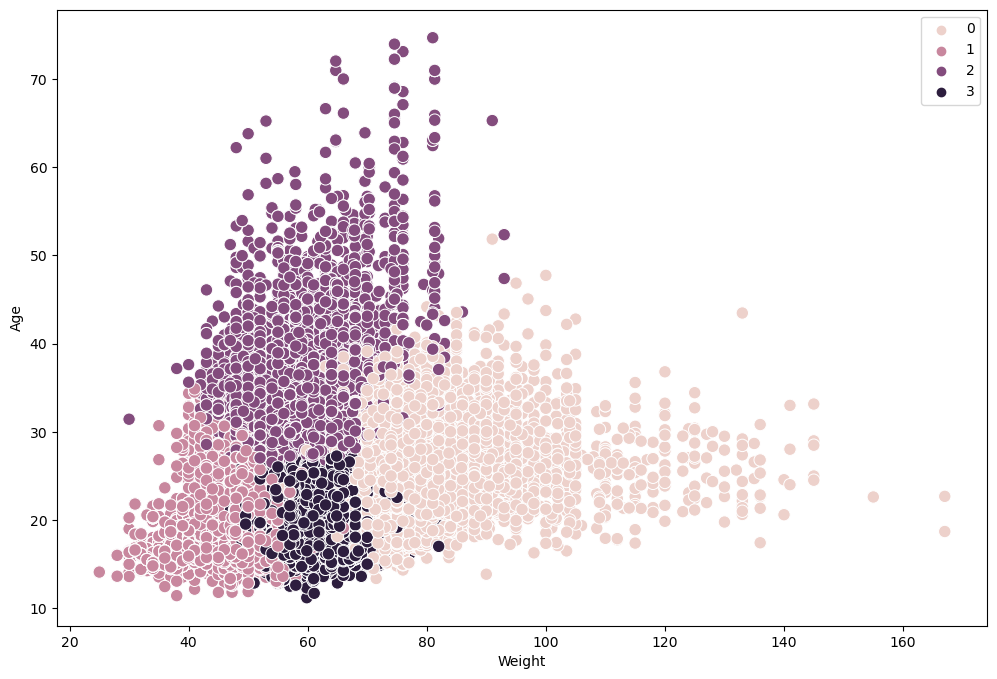

In [67]:
# Plot the clusters for the "weight" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=fem_cleaned['weight'], y=fem_cleaned['age'], hue=kmeans_fem.labels_, s=80) 


ax.grid(False) 
plt.xlabel('Weight') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

# 08. Clustering male data

In [68]:
# Check male df

male.head()

,Unnamed: 0,athlete_id,result_id,pos,medal,isTeamSport,name,gender,born,height,...,sport,result_detail,start_date,end_date,age,season,medal_code,gender_code,sport_code,season_code
0,0,64710,56265,DNS,na,False,Ernest Hutcheon,Male,1889-06-17,176.960745,...,Athletics,na,1908-07-20,1908-07-22,19.088296,Summer,3,1,9,0
1,1,64756,56313,DNS,na,False,Henry Murray,Male,1886-01-14,179.660099,...,Athletics,na,1908-07-21,1908-07-25,22.513347,Summer,3,1,9,0
2,2,64808,56338,3 h8 r1/2,na,False,Harvey Sutton,Male,1882-02-18,179.050863,...,Athletics,na,1908-07-20,1908-07-21,26.414784,Summer,3,1,9,0
3,3,922519,56338,DNS,na,False,Guy Haskins,Male,1883-12-23,179.050863,...,Athletics,na,1908-07-20,1908-07-21,24.572211,Summer,3,1,9,0
4,4,64735,56338,DNS,na,False,Joseph Lynch,Male,1878-04-22,179.050863,...,Athletics,na,1908-07-20,1908-07-21,30.242300,Summer,3,1,9,0


In [69]:
# Check columns

male.columns

Index(['Unnamed: 0', 'athlete_id', 'result_id', 'pos', 'medal', 'isTeamSport',
       'name', 'gender', 'born', 'height', 'weight', 'country', 'country_noc',
       'event_title', 'edition', 'edition_id', 'sport', 'result_detail',
       'start_date', 'end_date', 'age', 'season', 'medal_code', 'gender_code',
       'sport_code', 'season_code'],
      dtype='object')

In [70]:
# Drop non relevant columns for clustering

male = male.drop(columns = ['Unnamed: 0', 'athlete_id', 'result_id', 'pos','medal', 'isTeamSport', 'name', 'gender', 'born', 'country', 'country_noc', 'event_title', 'edition', 'edition_id','sport', 'result_detail', 'start_date', 'end_date', 'season', 'medal_code', 'gender_code', 'sport_code', 'season_code'])

In [71]:
# Check null values

male.isnull().sum()

height    826
weight    826
age       130
dtype: int64

In [72]:
male.dropna(subset = ['age'], inplace = True)

In [73]:
# Check null values

male.isnull().sum()

height    738
weight    738
age         0
dtype: int64

In [74]:
# Create now a data frame filtering rows with populated values in 'height' and 'weight'

male_cleaned = male[(male['height'].notnull()) & (male['weight'].notnull())]

In [75]:
male_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224729 entries, 0 to 314876
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   height  224729 non-null  float64
 1   weight  224729 non-null  float64
 2   age     224729 non-null  float64
dtypes: float64(3)
memory usage: 6.9 MB


## Standardize male data

In [76]:
# Transform data 

male_standard = scaler.fit_transform(male_cleaned)

In [77]:
male_standard

array([[-0.1879111 , -0.27715216, -1.20475835],
       [ 0.13058414, -0.32775615, -0.669927  ],
       [ 0.05870076, -0.65695592, -0.06070664],
       ...,
       [ 0.30834331,  0.15122776, -0.82298026],
       [ 0.52465732,  0.30216807, -0.17699291],
       [-0.65523729,  0.21824759,  1.43861673]])

## Applying elbow technique

In [87]:
num_cl_male = range(1, 10) # Defines the range of potential clusters in the data.
kmeans_male = [KMeans(n_clusters=i, n_init=10) for i in num_cl_male] # Defines k-means clusters in the range assigned above.

In [88]:
# Calculate scores for k-means

score_male = [kmeans_male[i].fit(male_standard).score(male_standard) for i in range(len(kmeans_male))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score_male

[-674187.0000000028,
 -441659.19951333967,
 -325416.08423324634,
 -249304.38204311248,
 -217480.40955464324,
 -190706.52629612468,
 -174519.44242228876,
 -160629.81495894573,
 -149085.36754542243]

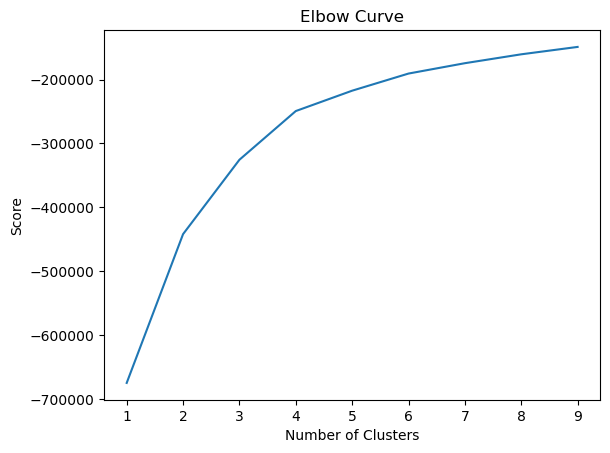

In [89]:
# Plot the elbow curve using PyLab

pl.plot(num_cl_male,score_male)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## k-means clustering

In [90]:
# Create the k-means object.

kmeans_male = KMeans(n_clusters = 4, n_init =10) 

In [91]:
# Fit the k-means object to the data.

kmeans_male.fit(male_standard)

KMeans(n_clusters=4, n_init=10)

## Attaching a new column to data frame with the resulting clusters

In [92]:
male_standard.shape

(224729, 3)

In [93]:
male_cleaned['clusters'] = kmeans.fit_predict(male_standard)

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_40826/1188742279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_cleaned['clusters'] = kmeans.fit_predict(male_standard)


In [94]:
male_cleaned.head()

,height,weight,age,clusters
0,176.960745,72.096796,19.088296,1
1,179.660099,71.493797,22.513347,1
2,179.050863,67.571038,26.414784,1
3,179.050863,67.571038,24.572211,1
4,179.050863,67.571038,30.242300,1


In [95]:
male_cleaned['clusters'].value_counts(dropna=False)

1    102597
0     54924
2     41531
3     25677
Name: clusters, dtype: int64

## Plot clusters : height vs. age

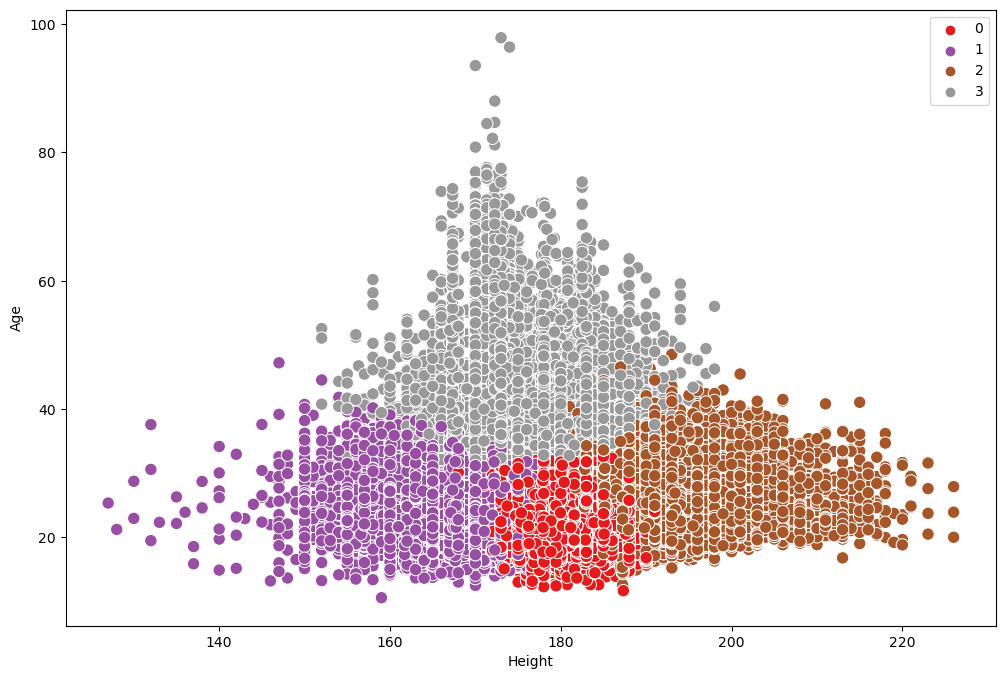

In [101]:
# Define custom colormap

custom_palette = sns.color_palette("Set1")  # Replace "Set1" with the colormap you want to use.


# Plot the clusters for the "height" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=male_cleaned['height'], y=male_cleaned['age'], hue=kmeans_male.labels_, s=80,palette=custom_cmap) 


ax.grid(False) 
plt.xlabel('Height') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

## Plot clusters : weight vs. age

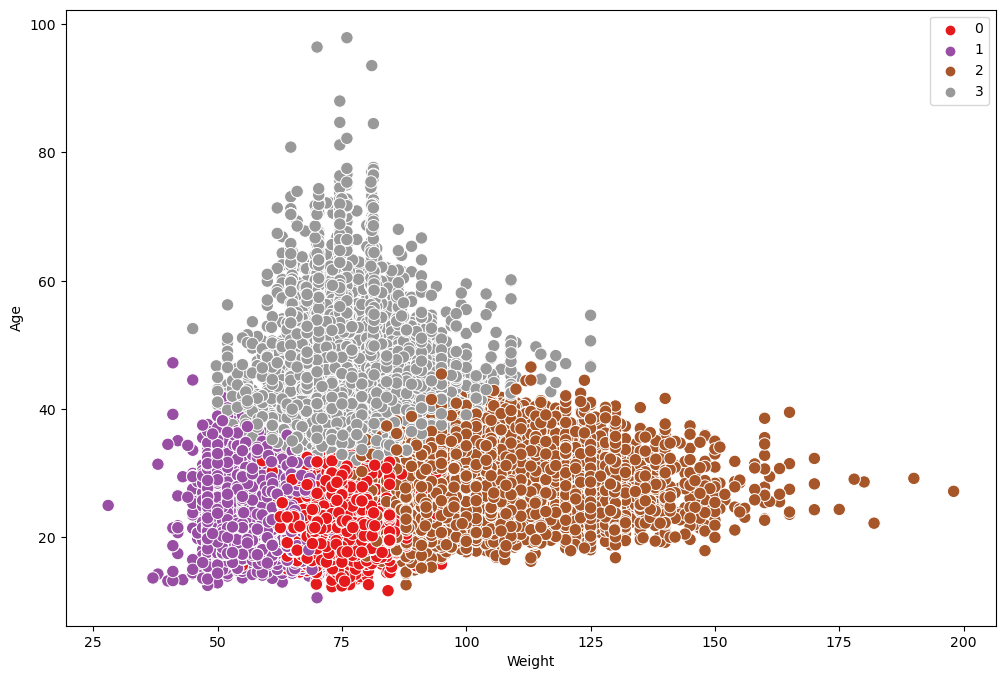

In [102]:
# Plot the clusters for the "weight" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=male_cleaned['weight'], y=male_cleaned['age'], hue=kmeans_male.labels_, s=80, palette=custom_cmap) 


ax.grid(False) 
plt.xlabel('Weight') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

## Observations on clusters

### Height vs. Weight

With this clustering in particular, is really difficult to identify cluster 2 in the graph. This kind of indicates overlapping between clusters. The three visible clusters follow the logic of the higher the weight, the bigger the height, which goes in line with the regression analysis performed on this data in the previous exercise. 

It would be interesting to analyse how this particular relationship looks like with 3 clusters, however, the current result might also mean that these particular variables are not appropiate for a cluster analysis. 

### Height vs. Age

With this particular analysis, the four clusters are easy to identify. Cluster 1 and 2 have similar heights but differenciate in age. While cluster 2 is younger, cluster two is tending toward older ages. These makes sense as many Olympic athletes start competing quite young and can continue competing in their senior years. Height after a certain age is a unvariable metric, so these two cluster make sense. 
At the same time, scientific data points to the fact that around age 40, most people lose some height. These correlates perfectly with cluster 3 that revolves around the older ages, but keeping a slightly shorter height than clusters 1 and 2.

### Weight vs. Age

This analysis has a similar distribution than the Height vs Age cluster analysis. The clusters also have a logical distributiion with cluster 0 having. Interestingly enough, there's two clusters, 1 and 2 that have similar weights but different ages. This indicates that weight is a variable that remains constant in Olympic Athletes, regardless of age, unlike height. Finally, I am surprised about the distribution of cluster number 3 the corresponds to a groups of the heaviest athletes, but not the oldest. It would be insteresting to find out more about this group of athletes. 

# 09. Calculate Descriptive Statistics

In [60]:
df_cleaned.loc[df_cleaned['clusters'] == 3, 'cluster'] = 'dark purple'
df_cleaned.loc[df_cleaned['clusters'] == 2, 'cluster'] = 'purple'
df_cleaned.loc[df_cleaned['clusters'] == 1, 'cluster'] = 'pink'
df_cleaned.loc[df_cleaned['clusters'] == 0, 'cluster'] = 'light pink'

/var/folders/pp/r24xg_5d3x54jxxzxmjgr2z00000gn/T/ipykernel_4657/3998319685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[df_cleaned['clusters'] == 3, 'cluster'] = 'dark purple'


In [61]:
df_cleaned.groupby('cluster').agg({'height':['mean', 'median'], 
                         'weight':['mean', 'median'], 
                         'age':['mean', 'median']})

height            weight               age           
                   mean median       mean median       mean     median
cluster                                                               
dark purple  188.826231  188.0  91.289977   89.0  26.639246  26.327173
light pink   165.194670  167.0  57.933406   59.0  23.651880  23.540041
pink         178.404162  178.0  72.903784   73.0  24.359937  24.276523
purple       175.104711  175.0  72.287393   73.0  38.210958  35.989049

Looking at the statistics, it is easier to tell that the purple cluster is the oldest while the light pink is the youngest. Dark purple cluster is the one that definitely meets the original hypothesis of 'the bigger the weight the higher the higher an athlete is. Based on this one can also conclude that light pink athletes are youth athletes beginning their Olympic carrier being the youngest, thinnest and shortest of the clusters. They are followed by the pink cluster who correspond to young adults athletes who have of course an older age then the first cluster, and also have increased in size and weight. The are followed by dark purple athletes who are also young adults but tend towards the heavier weights but are the tallest from all 4. Finally, purple athletes are the veterans who gravitate towards average weights and heights.

# 10. Propose future steps of an analytics pipeline

 For me the next logical step is to take a look and anayse if there's a correlation between these clusters and the Olympic disciplines they belong to nd potentially, to the number of medals won. 